In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import furniture_bench
import gym
import tarfile

from pathlib import Path
from tqdm import tqdm
import pickle
from src.visualization.render_mp4 import render_mp4

from src.gym import get_env

Importing module 'gym_38' (/home/larsankile/isaacgym/python/isaacgym/_bindings/linux-x86_64/gym_38.so)
Setting GYM_USD_PLUG_INFO_PATH to /home/larsankile/isaacgym/python/isaacgym/_bindings/linux-x86_64/usd/plugInfo.json


In [ ]:
env = get_env(
    furniture="lamp",
    obs_type="state",
    gpu_id=0,
)

In [3]:
root = Path("/home/larsankile/furniture-diffusion/data/")
randomness = "low"
furniture = "lamp"
extension = ".tar.gz"
filename = furniture + extension


input_file = root / "raw" / "real" / "image" / randomness / filename
output_file = (
    root / "processed" / "real" / "feature" / randomness / furniture / "data.zarr"
)

In [9]:
raw_data = []

with tarfile.open(input_file, "r:gz") as tar:
    for member in tqdm(tar, desc="Extracting lamp", total=150):
        if (
            member.isfile() and ".pkl" in member.name
        ):  # Replace 'your_condition' with actual condition
            with tar.extractfile(member) as f:
                if f is not None:
                    content = f.read()
                    data = pickle.loads(content)
                    raw_data.append(data)

100%|█████████▉| 561/562 [04:43<00:00,  1.98it/s]
Extracting lamp: 151it [02:45,  1.09s/it]


In [16]:
data = raw_data[3]
obs = env.reset()
obs.keys()

dict_keys(['robot_state', 'parts_poses', 'color_image1', 'color_image2'])

In [17]:
frames = []

for action in tqdm(data["actions"]):
    obs, reward, done, info = env.step(action)
    frames.append((obs["color_image1"], obs["color_image2"]))
    if done:
        break

  0%|          | 0/624 [00:00<?, ?it/s]

100%|██████████| 624/624 [00:26<00:00, 23.71it/s]


100%|█████████▉| 623/624 [00:38<00:00, 16.87it/s]

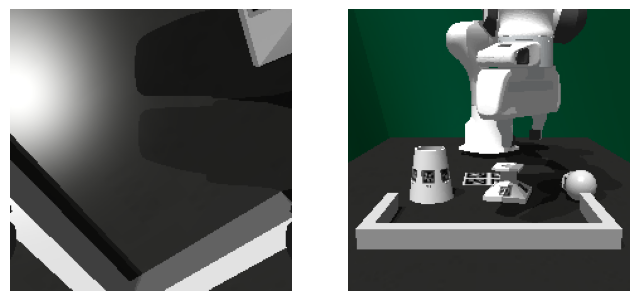

100%|█████████▉| 623/624 [00:56<00:00, 16.87it/s]

In [18]:
render_mp4(*zip(*frames), filename="lamp.mp4")